# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [29]:
# Carregando os DataFrames a partir dos arquivos CSV
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

In [11]:
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [16]:
print(dados_ro.columns)

Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')


In [20]:
dados_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
# Definindo as faixas de Latitude
faixa_acima = sinasc_raw['munResLat'] > -10.5
faixa_abaixo = ~faixa_acima

# Aplicando groupby com as faixas de Latitude
grouped_latitudes = sinasc_raw.groupby([faixa_acima, faixa_abaixo])

# Definindo as variáveis numéricas alvo
variaveis_numericas = ['CONSULTAS', 'QTDPARTCES']

# Calculando estatísticas para cada variável numérica
estatisticas = grouped_latitudes[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Flatten (achatando) as colunas do índice resultante do groupby
estatisticas.columns = ['_'.join(col).strip() for col in estatisticas.columns.values]

# Removendo a coluna de índice para obter um DataFrame plano
estatisticas.reset_index(drop=True, inplace=True)

# Exibindo o resultado
print(estatisticas)


   CONSULTAS_sum  CONSULTAS_mean  CONSULTAS_min  CONSULTAS_max  \
0          48001        3.694090              1              9   
1          48662        3.467436              1              9   

   CONSULTAS_median  CONSULTAS_std  CONSULTAS_var  QTDPARTCES_sum  \
0               4.0       0.643781       0.414454          7095.0   
1               4.0       0.888240       0.788970          6041.0   

   QTDPARTCES_mean  QTDPARTCES_min  QTDPARTCES_max  QTDPARTCES_median  \
0         0.552527             0.0            12.0                0.0   
1         0.487335             0.0            12.0                0.0   

   QTDPARTCES_std  QTDPARTCES_var  
0        0.753022        0.567042  
1        0.737899        0.544495  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
# Definindo as faixas de Área
faixa_acima = sinasc_raw['munResArea'] > 3000
faixa_abaixo = ~faixa_acima

# Aplicando groupby com as faixas de Área
grouped_areas = sinasc_raw.groupby([faixa_acima, faixa_abaixo])

# Definindo as variáveis numéricas alvo
variaveis_numericas = ['QTDPARTNOR', 'PESO']

# Calculando estatísticas para cada variável numérica
estatisticas = grouped_areas[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Flatten (achatando) as colunas do índice resultante do groupby
estatisticas.columns = ['_'.join(col).strip() for col in estatisticas.columns.values]

# Removendo a coluna de índice para obter um DataFrame plano
estatisticas.reset_index(drop=True, inplace=True)

# Exibindo o resultado
print(estatisticas)

   QTDPARTNOR_sum  QTDPARTNOR_mean  QTDPARTNOR_min  QTDPARTNOR_max  \
0          1913.0         0.371456             0.0            10.0   
1         12659.0         0.632982             0.0            41.0   

   QTDPARTNOR_median  QTDPARTNOR_std  QTDPARTNOR_var  PESO_sum    PESO_mean  \
0                0.0        0.856402        0.733425  16799831  3218.358429   
1                0.0        1.278932        1.635668  70857126  3249.134538   

   PESO_min  PESO_max  PESO_median    PESO_std      PESO_var  
0       258      5720       3245.0  531.532175  282526.45265  
1       292      5985       3280.0  547.716582  299993.45372  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [8]:
# Criando faixas acima e abaixo de 400.0 para a variável 'munResAlt'
faixas_alt = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), 400.0, float('inf')], labels=['Abaixo 400.0', 'Acima 400.0'])

# Aplicando groupby com as faixas de Altitude
grouped_altitudes = sinasc_raw.groupby(faixas_alt)

# Definindo as variáveis numéricas alvo
variaveis_numericas = ['QTDFILVIVO', 'QTDFILMORT']

# Calculando estatísticas para cada variável numérica
estatisticas = grouped_altitudes[variaveis_numericas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

# Achatando as colunas do índice resultante do groupby
estatisticas.columns = ['_'.join(col).strip() for col in estatisticas.columns.values]

# Resetando o índice para obter um DataFrame plano
estatisticas.reset_index(inplace=True)

# Exibindo o resultado
print(estatisticas)

      munResAlt  QTDFILVIVO_sum  QTDFILVIVO_mean  QTDFILVIVO_min  \
0  Abaixo 400.0         25172.0         1.064085             0.0   
1   Acima 400.0          1654.0         0.919911             0.0   

   QTDFILVIVO_max  QTDFILVIVO_median  QTDFILVIVO_std  QTDFILVIVO_var  \
0            30.0                1.0        1.179993        1.392384   
1            10.0                1.0        1.034859        1.070933   

   QTDFILMORT_sum  QTDFILMORT_mean  QTDFILMORT_min  QTDFILMORT_max  \
0          6190.0         0.267583             0.0             9.0   
1           453.0         0.252227             0.0            28.0   

   QTDFILMORT_median  QTDFILMORT_std  QTDFILMORT_var  
0                0.0        0.592465        0.351014  
1                0.0        0.842711        0.710162  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

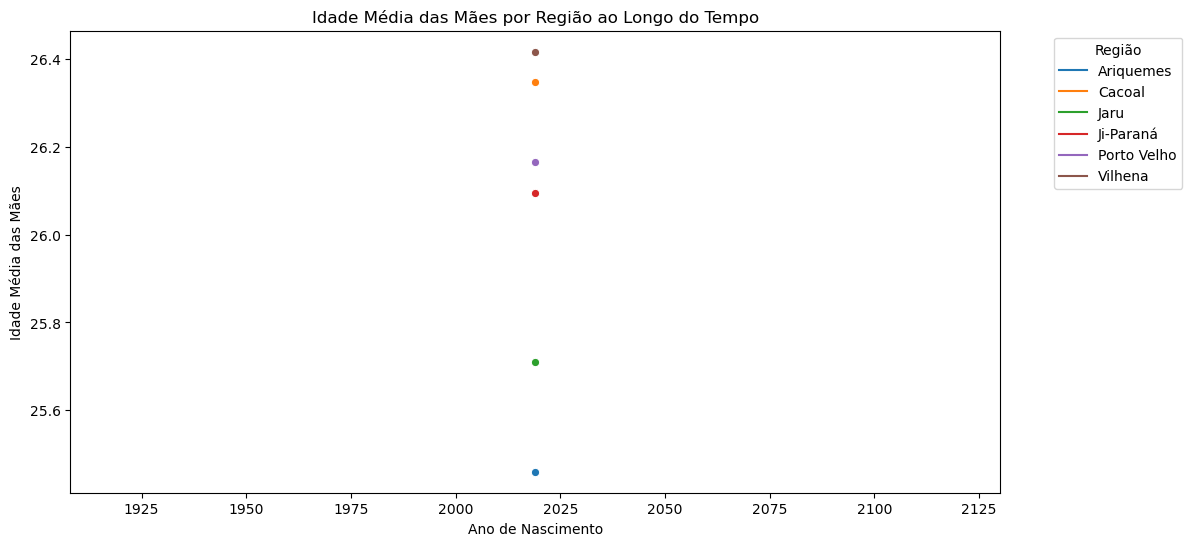

In [15]:
# Convertendo a coluna 'DTNASC' para o formato de data
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Adicionando uma coluna para o ano do nascimento
sinasc_raw['AnoNascimento'] = sinasc_raw['DTNASC'].dt.year

# Mapeando os municípios para regiões usando o dicionário
sinasc_raw['Regiao'] = sinasc_raw['munResNome'].map(dict(zip(dados_ro['municipio'], dados_ro['regiao'])))

# Agrupando por 'Regiao' e 'AnoNascimento' e calculando a média da idade das mães
idade_media_por_regiao = sinasc_raw.groupby(['Regiao', 'AnoNascimento'])['IDADEMAE'].mean().reset_index()

# Criando um gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=idade_media_por_regiao, x='AnoNascimento', y='IDADEMAE', hue='Regiao', marker='o')
plt.title('Idade Média das Mães por Região ao Longo do Tempo')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [31]:
# Definindo as faixas para IDH com base nas informações fornecidas
faixas_idh = [(0.584, 0.598, 'Baixo'), (0.607, 0.692, 'Médio'), (0.700, 0.736, 'Alto')]

# Mapeando os municípios para faixas de IDH no DataFrame real 'dados_ro'
dados_ro['FaixaIDH'] = pd.cut(dados_ro['idh'], bins=[faixa[0] for faixa in faixas_idh] + [faixas_idh[-1][1]], labels=[faixa[2] for faixa in faixas_idh])

# Criando um dicionário de mapeamento de faixas para regiões
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

# Aplicando o mapeamento de faixas para regiões
dados_ro['Regiao'] = dados_ro['municipio'].map(regioes_map)

# Agrupando por 'FaixaIDH' e 'Regiao' e realizando operações desejadas
resultados_agrupados = dados_ro.groupby(['FaixaIDH', 'Regiao']).agg({'idh': ['count', 'mean']}).reset_index()

# Renomeando as colunas para melhor visualização
resultados_agrupados.columns = ['FaixaIDH', 'Regiao', 'Quantidade', 'MédiaIDH']

# Exibindo os resultados
print(resultados_agrupados)

   FaixaIDH       Regiao  Quantidade  MédiaIDH
0     Baixo    Ariquemes           2  0.600000
1     Baixo       Cacoal           1  0.592000
2     Baixo         Jaru           3  0.593667
3     Baixo    Ji-Paraná           2  0.592500
4     Baixo  Porto Velho           1  0.587000
5     Baixo      Vilhena           0       NaN
6     Médio    Ariquemes           5  0.628400
7     Médio       Cacoal          11  0.651182
8     Médio         Jaru           1  0.689000
9     Médio    Ji-Paraná          10  0.637900
10    Médio  Porto Velho           3  0.640000
11    Médio      Vilhena           6  0.659500
12     Alto    Ariquemes           1  0.702000
13     Alto       Cacoal           2  0.714000
14     Alto         Jaru           0       NaN
15     Alto    Ji-Paraná           1  0.714000
16     Alto  Porto Velho           1  0.736000
17     Alto      Vilhena           1  0.731000


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [32]:
# Definindo as faixas para IFDM com base nas informações fornecidas
faixas_ifdm = [(0.4562, 0.5973, 'Desenvolvimento Regular'), (0.6006, 0.7746, 'Desenvolvimento Moderado')]

# Mapeando os municípios para faixas de IFDM no DataFrame real 'dados_ro'
dados_ro['FaixaIFDM'] = pd.cut(dados_ro['ifdm'], bins=[faixa[0] for faixa in faixas_ifdm] + [faixas_ifdm[-1][1]], labels=[faixa[2] for faixa in faixas_ifdm])

# Criando um dicionário de mapeamento de faixas para regiões
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

# Aplicando o mapeamento de faixas para regiões
dados_ro['Regiao'] = dados_ro['municipio'].map(regioes_map)

# Agrupando por 'FaixaIFDM' e 'Regiao' e realizando operações desejadas
resultados_agrupados_ifdm = dados_ro.groupby(['FaixaIFDM', 'Regiao']).agg({'ifdm': ['count', 'mean']}).reset_index()

# Renomeando as colunas para melhor visualização
resultados_agrupados_ifdm.columns = ['FaixaIFDM', 'Regiao', 'Quantidade', 'MédiaIFDM']

# Exibindo os resultados
print(resultados_agrupados_ifdm)

                   FaixaIFDM       Regiao  Quantidade  MédiaIFDM
0    Desenvolvimento Regular    Ariquemes           4   0.544575
1    Desenvolvimento Regular       Cacoal           7   0.561757
2    Desenvolvimento Regular         Jaru           3   0.547900
3    Desenvolvimento Regular    Ji-Paraná           7   0.576871
4    Desenvolvimento Regular  Porto Velho           3   0.550933
5    Desenvolvimento Regular      Vilhena           2   0.582300
6   Desenvolvimento Moderado    Ariquemes           4   0.659775
7   Desenvolvimento Moderado       Cacoal           7   0.671471
8   Desenvolvimento Moderado         Jaru           1   0.645000
9   Desenvolvimento Moderado    Ji-Paraná           6   0.648850
10  Desenvolvimento Moderado  Porto Velho           2   0.672800
11  Desenvolvimento Moderado      Vilhena           5   0.666840


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [33]:
# Definindo as faixas para o PIB com base nas informações fornecidas
faixas_pib = [0, 100000000, 200000000, 300000000, 500000000, 1000000000, float('inf')]
rotulos_pib = ['Até 100 Milhões', 'Acima de 100 Milhões', 'Acima de 200 Milhões', 'Acima de 300 Milhões', 'Acima de 500 Milhões', 'Acima de 1 Bilhão']

# Mapeando os municípios para faixas de PIB no DataFrame real 'dados_ro'
dados_ro['FaixaPIB'] = pd.cut(dados_ro['pib'], bins=faixas_pib, labels=rotulos_pib, right=False)

# Criando um dicionário de mapeamento de faixas para regiões
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))

# Aplicando o mapeamento de faixas para regiões
dados_ro['Regiao'] = dados_ro['municipio'].map(regioes_map)

# Agrupando por 'FaixaPIB' e 'Regiao' e realizando operações desejadas
resultados_agrupados_pib = dados_ro.groupby(['FaixaPIB', 'Regiao']).agg({'pib': ['count', 'mean']}).reset_index()

# Renomeando as colunas para melhor visualização
resultados_agrupados_pib.columns = ['FaixaPIB', 'Regiao', 'Quantidade', 'MédiaPIB']

# Exibindo os resultados
print(resultados_agrupados_pib)

                FaixaPIB       Regiao  Quantidade      MédiaPIB
0        Até 100 Milhões    Ariquemes           8  5.837865e+05
1        Até 100 Milhões       Cacoal          14  5.078472e+05
2        Até 100 Milhões         Jaru           5  5.055452e+05
3        Até 100 Milhões    Ji-Paraná          13  5.521271e+05
4        Até 100 Milhões  Porto Velho           5  4.002284e+06
5        Até 100 Milhões      Vilhena           7  6.059301e+05
6   Acima de 100 Milhões    Ariquemes           0           NaN
7   Acima de 100 Milhões       Cacoal           0           NaN
8   Acima de 100 Milhões         Jaru           0           NaN
9   Acima de 100 Milhões    Ji-Paraná           0           NaN
10  Acima de 100 Milhões  Porto Velho           0           NaN
11  Acima de 100 Milhões      Vilhena           0           NaN
12  Acima de 200 Milhões    Ariquemes           0           NaN
13  Acima de 200 Milhões       Cacoal           0           NaN
14  Acima de 200 Milhões         Jaru   

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.


Correlação entre IDH e Desenvolvimento Social:

Verifica-se que há relação entre o Índice de Desenvolvimento Humano (IDH) e o Índice Firjan de Desenvolvimento Municipal (IFDM). Há uma correlação positiva entre essas variáveis. 

Distribuição do PIB por Região:

A distribuição do Produto Interno Bruto (PIB) tem  maior concentração em alguns municípios. Porto Velho possui o maior PIB de Rondônia. Ji-Paraná, na região central de Rondônia, possui o 2º maior PIB. Vilhena possui o 3º maior PIB de Rondônia. A cidade de Cacoal fica na 5ª colocação. 

Impacto do Desenvolvimento Moderado no PIB:
Municípios classificados com desenvolvimento moderado no IFDM também se destacam em relação ao PIB. 

Influência da Latitude nas Consultas Médicas:

Conforme o gráfico abaixo, também existe uma provável correlação entre a localização dos municípios e o número de consultas médicas. Municípios em determinadas faixas de latitude parecem  apresentar padrões distintos em relação ao acesso a consultas médicas.

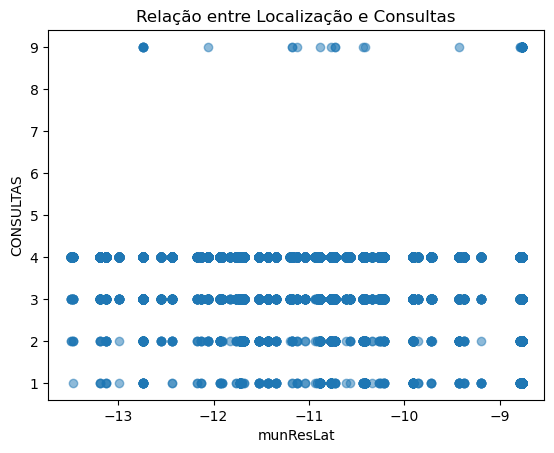

In [46]:
# Criando um gráfico de dispersão
plt.scatter(sinasc_raw['munResLat'], sinasc_raw['CONSULTAS'], alpha=0.5)
plt.title('Relação entre Localização e Consultas')
plt.xlabel('munResLat')
plt.ylabel('CONSULTAS')
plt.show()